In [21]:
import numpy as np
import seaborn as sns
import datetime as dt
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Save Model using Pickle
from pickle import dump
from pickle import load

import yfinance as yfin

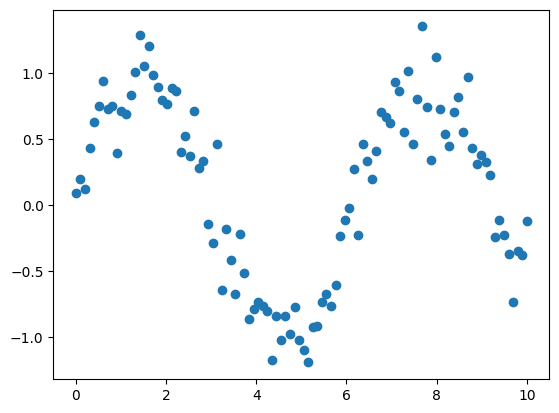

In [22]:
def create_dataset(n):
  x = np.linspace(0, 10, n)
  y = np.sin(x) + np.random.randn(n) * 0.2
  return x, y

X, Y = create_dataset(100)
plt.scatter(X, Y)

In [23]:
yfin.pdr_override()

start = dt.datetime(2018, 1, 1)
end = dt.datetime(2022, 3, 28)

stk_tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOG']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.get_data_yahoo(stk_tickers, start, end)
ccy_data = web.get_data_fred(ccy_tickers, start, end)
idx_data = web.get_data_fred(idx_tickers, start, end)
# stk_data = web.DataReader(stk_tickers, 'yahoo', start, end)
# ccy_data = web.DataReader(ccy_tickers, 'fred', start, end)
# idx_data = web.DataReader(idx_tickers, 'fred', start, end)

[*********************100%%**********************]  5 of 5 completed


In [24]:
X_merged = stk_data['Adj Close'].merge(ccy_data, how='inner', left_index=True, right_index=True)
X_data = X_merged.merge(idx_data, how='inner', left_index=True, right_index=True)
X_data.head()

,AAPL,AMZN,GOOG,MSFT,TSLA,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS
2018-01-02,40.776520,59.450500,53.250000,80.391838,21.368668,112.18,1.3596,2695.81,24824.01,9.77
2018-01-03,40.769424,60.209999,54.124001,80.765984,21.150000,112.28,1.3522,2713.06,24922.68,9.15
2018-01-04,40.958801,60.479500,54.320000,81.476830,20.974667,112.78,1.3539,2723.99,25075.13,9.22
2018-01-05,41.425133,61.457001,55.111500,82.487022,21.105333,113.18,1.3562,2743.15,25295.87,9.22
2018-01-08,41.271255,62.343498,55.347000,82.571175,22.427334,113.08,1.3566,2747.71,25283.00,9.52
